## We gaan blurren aan de hand van code van deze website:
De website staat erbij zodat als je hier voor de individuele opdracht verder mee wilt, dan kan dat. In de link wordt eerst een gezicht gedetecteerd om daar vervolgens een blurring algoritme op te gebruiken. Wij gaan alleen gebruikmaken van blurren. Doel: Snappen wat er gebeurt met blurren en hoe je gedeeltes van foto's kan blurren.

Blurren:
https://pyimagesearch.com/2020/04/06/blur-and-anonymize-faces-with-opencv-and-python/

Face detection:
https://pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/



## Stap 1: begrijpen wat er gebeurt in onderstaande code:

In [25]:
# import the necessary packages
import numpy as np
import cv2

def anonymize_face_pixelate(image, blocks=3):
    # divide the input image into NxN blocks
    (h, w) = image.shape[:2]
    xSteps = np.linspace(0, w, blocks + 1, dtype="int")
    ySteps = np.linspace(0, h, blocks + 1, dtype="int")
    # loop over the blocks in both the x and y direction
    for i in range(1, len(ySteps)):
        for j in range(1, len(xSteps)):
            # compute the starting and ending (x, y)-coordinates
            # for the current block
            startX = xSteps[j - 1]
            startY = ySteps[i - 1]
            endX = xSteps[j]
            endY = ySteps[i]
            # extract the ROI using NumPy array slicing, compute the
            # mean of the ROI, and then draw a rectangle with the
            # mean RGB values over the ROI in the original image
            roi = image[startY:endY, startX:endX]
            (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
            cv2.rectangle(image, (startX, startY), (endX, endY),
                (B, G, R), -1)
    # return the pixelated blurred image
    return image

Zorg dat de afbeeldingen ingeladen kunnen worden. Ik heb nu een image van vorige week gebruikt


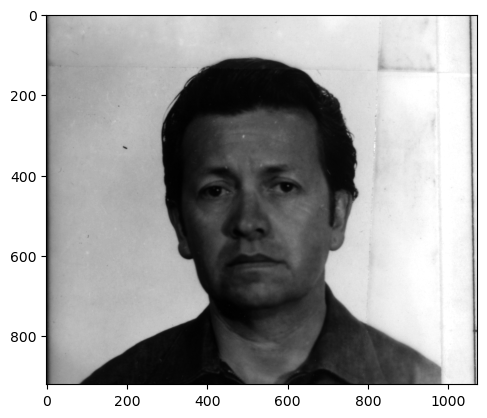

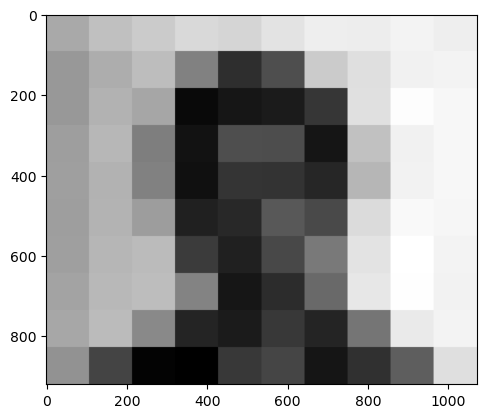

In [33]:
image_name = '00001_3_F.png'
image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()
new_image = anonymize_face_pixelate(image, blocks=10)
plt.imshow(image, cmap='gray')
plt.show()

### Doe de volgende dingen:

* Zorg dat er meer pixels komen in de blur (minder erge blur).
* Blur alleen de hoek van de foto en laat dit zien (dit gedeelte hoeft nog niet terug in de originele foto gestopt te worden)
* Pak nu het midden van de foto om te blurren (probeer het gezicht te pakken).

In [ ]:
...
## new_image = anonymize_face_pixelate(image, blocks=10)
# plt.imshow(new_image, cmap='gray')

### We gaan verder met de Gaussian Blur
* Wat is een Gaussian Blur?
* Waarom zou je dit gebruiken?
* Geef een output image die je met de Gaussian Blur 'blurt'
* Speel met de factor, wat verandert er als je deze aanpast?

In [ ]:

def anonymize_face_simple(image, factor=3.0):
    # automatically determine the size of the blurring kernel based
    # on the spatial dimensions of the input image
    (h, w) = image.shape[:2]
    kW = int(w / factor)
    kH = int(h / factor)
    # ensure the width of the kernel is odd
    if kW % 2 == 0:
        kW -= 1
    # ensure the height of the kernel is odd
    if kH % 2 == 0:
        kH -= 1
    # apply a Gaussian blur to the input image using our computed
    # kernel size
    return cv2.GaussianBlur(image, (kW, kH), 0)

### Gebruik een deel van de foto om te blurren en deze terug in de originele afbeelding te stoppen:
In de code van de website detecteren ze het gezicht met een model. Deze stap slaan we voor nu even over. We gaan wel een deel de foto 'blurren' en dan daarna weer terugstoppen in de originele afbeelding. Welk deel van de code heb je hiervoor nodig?

* Bepaal zelf waar het gezicht is, 
* 'blur' dit gedeelte 
* stop het geblurde gedeelte weer terug in de originele foto
* Laat beide afbeeldingen naast elkaar zien (ik heb nu een klein stukje code hiervoor al gekopieerd, maar kan ook anders)


In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # detection
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the confidence is greater
    # than the minimum confidence
    if confidence > args["confidence"]:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # extract the face ROI
        face = image[startY:endY, startX:endX]

In [ ]:
# check to see if we are applying the "simple" face blurring
        # method
        if args["method"] == "simple":
            face = anonymize_face_simple(face, factor=3.0)
        # otherwise, we must be applying the "pixelated" face
        # anonymization method
        else:
            face = anonymize_face_pixelate(face,
                blocks=args["blocks"])
        # store the blurred face in the output image
        image[startY:endY, startX:endX] = face

In [ ]:
# display the original image and the output image with the blurred
# face(s) side by side
output = np.hstack([orig, image])
cv2.imshow("Output", output)